# 2U Analysis 


In [20]:
import os
import pandas as pd
import numpy as np
import datetime as dt 
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation
import matplotlib.pyplot as plt
from pathlib import Path
%matplotlib inline 

import statsmodels.api as sm
from pylab import mpl, plt
import scipy.stats as scs
import scipy.optimize as sco
import time
plt.style.use('seaborn')
mpl.rcParams['font.family'] = 'serif'
from pathlib import Path
import seaborn as sns

In [21]:
load_dotenv()

True

In [22]:
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

print(f"Alpaca Key Type: {type(alpaca_api_key)}")
print(f"Alpaca Secret Key Type: {type(alpaca_secret_key)}")

Alpaca Key Type: <class 'str'>
Alpaca Secret Key Type: <class 'str'>


In [23]:
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version = "v2"
)

In [24]:
timeframe = "1D"

start_date = pd.Timestamp("2016-09-10", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2021-02-19", tz="America/New_York").isoformat()

ticker = ['TWOU']

Twou_df = alpaca.get_barset(
    ticker,
    timeframe,
    start=start_date,
    end=end_date

).df
Twou_df.head()

TWOU                              
                            open   high     low  close  volume
2020-09-28 00:00:00-04:00  35.66  36.38  34.780  35.70  941430
2020-09-29 00:00:00-04:00  35.68  36.09  34.900  35.15  575926
2020-09-30 00:00:00-04:00  35.08  35.47  33.525  33.85  779276
2020-10-01 00:00:00-04:00  34.20  34.92  33.170  34.85  885426
2020-10-02 00:00:00-04:00  33.65  35.00  33.330  34.25  638115

In [25]:
MC_Three_Year = MCSimulation(
    portfolio_data = Twou_df,
    num_simulation = 500,
    num_trading_days = 252*3
)


MC_Three_Year.portfolio_data.head()

TWOU                                           
                            open   high     low  close  volume daily_return
2020-09-28 00:00:00-04:00  35.66  36.38  34.780  35.70  941430          NaN
2020-09-29 00:00:00-04:00  35.68  36.09  34.900  35.15  575926    -0.015406
2020-09-30 00:00:00-04:00  35.08  35.47  33.525  33.85  779276    -0.036984
2020-10-01 00:00:00-04:00  34.20  34.92  33.170  34.85  885426     0.029542
2020-10-02 00:00:00-04:00  33.65  35.00  33.330  34.25  638115    -0.017217

In [26]:
MC_Three_Year.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.968125,1.025104,1.047892,0.999648,0.978519,1.071269,1.022357,1.010010,0.967072,0.958578,...,1.044545,1.012479,1.037498,1.076337,1.003343,1.071220,1.006030,0.938962,1.023571,0.990396
2,0.940156,1.039816,1.098717,0.957123,0.963681,1.100401,1.021238,1.068586,1.008367,0.970020,...,1.087141,0.983573,1.090632,1.072185,1.032402,0.957095,1.029898,0.984186,1.059923,1.003923
3,0.928681,1.088161,1.094553,0.952469,1.009707,1.149035,1.045221,1.039669,1.062807,1.038701,...,1.097182,0.969877,1.096883,1.044040,1.047203,0.916435,0.999712,1.013208,1.098248,1.034122
4,0.962798,1.101600,1.050702,0.915956,1.057813,1.151179,0.994574,1.048988,1.086860,0.985733,...,1.113142,1.002995,1.089655,1.091008,1.080245,0.942402,1.010664,0.970709,1.122156,0.982132
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
752,15.714098,47.665339,1.589142,16.638518,1.678327,16.282785,32.927222,4.752405,6.075011,19.447462,...,2.252805,221.575209,26.080228,18.885036,34.669369,9.005964,16.915002,36.401496,11.934057,22.242455
753,15.265945,49.708829,1.554549,16.286634,1.728302,16.447416,33.668392,4.875834,6.476251,20.101138,...,2.352253,226.576326,27.107468,18.758939,34.391709,9.139165,17.142148,36.588113,11.531506,21.670575
754,15.816371,48.302406,1.643535,15.270359,1.953629,17.495846,34.630909,5.091573,6.377116,19.574157,...,2.444939,246.590792,27.674406,20.321472,34.224698,9.048780,15.447895,36.928281,11.042139,21.229867
755,16.417122,47.580537,1.630097,14.457045,1.987002,18.100030,35.618127,5.268593,6.496605,19.397182,...,2.396552,251.887071,28.080146,19.069625,33.823280,8.984103,15.425915,38.239492,11.131272,22.148837


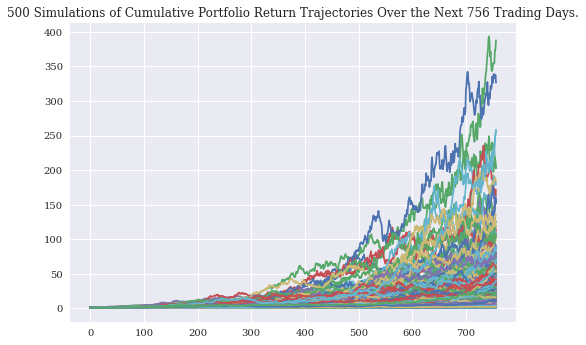

In [27]:
line_plot = MC_Three_Year.plot_simulation()

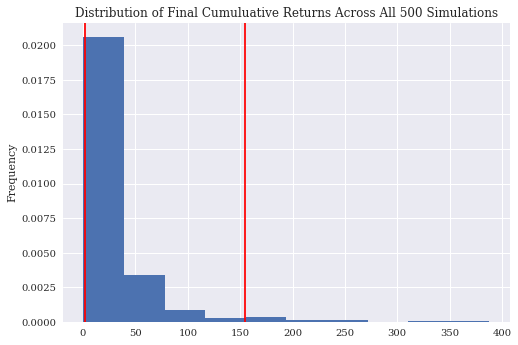

In [28]:
dist_plot = MC_Three_Year.plot_distribution()

In [17]:
TWOU_tbl = MC_Three_Year.summarize_cumulative_return()

print(even_tbl)

count           500.000000
mean              2.865694
std               2.392529
min               0.152514
25%               1.237337
50%               2.106726
75%               3.738556
max              14.681387
95% CI Lower      0.424735
95% CI Upper      9.836154
Name: 756, dtype: float64


In [18]:
even_ci_lower = round(even_tbl[8]*10000,2)
even_ci_upper = round(even_tbl[9]*10000,2)

In [19]:
print(f"There is a 95% chance that an initial investment of $10,000 in the portfolio"
      f" over the next 3 years will end within in the range of"
      f" ${even_ci_lower} and ${even_ci_upper}.")

There is a 95% chance that an initial investment of $10,000 in the portfolio over the next 3 years will end within in the range of $4247.35 and $98361.54.


In [14]:
csvpath = Path ( "TWOU.csv")

In [15]:
TWOU_df = pd.read_csv(csvpath,parse_dates=True, infer_datetime_format=True)
TWOU_df = TWOU_df.dropna()
TWOU_df = TWOU_df.set_index('Date')
TWOU_df.columns = pd.MultiIndex.from_product([['TWOU'],TWOU_df.columns])
TWOU_df.head()

TWOU                                        
             Open    High    Low  Close Adj Close  Volume
Date                                                     
2014-04-01  13.65  14.150  13.65  14.06     14.06  467300
2014-04-02  14.10  15.610  13.93  15.61     15.61  592100
2014-04-03  15.85  15.890  13.27  14.15     14.15  485200
2014-04-04  13.89  14.190  13.00  13.06     13.06  415300
2014-04-07  13.05  13.388  12.83  12.99     12.99  213600